# Importing modules for data analysis/machine learning

In [2]:
# numpy and pandas for handling data
import pandas as pd
import numpy as np

# matplotlib for visualization
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [4]:
train = pd.read_csv('train_month_3_with_target.csv', index_col='client_id')
test = pd.read_csv('test_month_3.csv', index_col='client_id')

# Checking and cleaning the data

In [5]:
# Check the imbalance
print(train.groupby(['target']).size())
train['target'].value_counts()/len(train)

target
0    61784
1     1913
dtype: int64


0    0.969967
1    0.030033
Name: target, dtype: float64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63697 entries, 910df42ad36243aa4ce16324cd7b15b0 to 977dda870c3f54df46297df3869b2907
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   homebanking_active                 63697 non-null  int64  
 1   has_homebanking                    63697 non-null  int64  
 2   has_insurance_21                   63697 non-null  int64  
 3   has_insurance_23                   63697 non-null  int64  
 4   has_life_insurance_fixed_cap       63697 non-null  int64  
 5   has_life_insurance_decreasing_cap  63697 non-null  int64  
 6   has_fire_car_other_insurance       63697 non-null  int64  
 7   has_personal_loan                  63697 non-null  int64  
 8   has_mortgage_loan                  63697 non-null  int64  
 9   has_current_account                63697 non-null  int64  
 10  has_pension_saving                 63697 non-null  int64  
 11  h

In [7]:
print(train.isnull().sum())

homebanking_active                       0
has_homebanking                          0
has_insurance_21                         0
has_insurance_23                         0
has_life_insurance_fixed_cap             0
has_life_insurance_decreasing_cap        0
has_fire_car_other_insurance             0
has_personal_loan                        0
has_mortgage_loan                        0
has_current_account                      0
has_pension_saving                       0
has_savings_account                      0
has_savings_account_starter              0
has_current_account_starter              0
bal_insurance_21                         0
bal_insurance_23                         0
cap_life_insurance_fixed_cap             0
cap_life_insurance_decreasing_cap        0
prem_fire_car_other_insurance            0
bal_personal_loan                        0
bal_mortgage_loan                        0
bal_current_account                      0
bal_pension_saving                       0
bal_savings

In [8]:
train['customer_since_all'] = pd.to_datetime(train['customer_since_all'])
train['customer_since_bank'] = pd.to_datetime(train['customer_since_bank'])
train['customer_birth_date'] = pd.to_datetime(train['customer_birth_date'])

In [9]:
import datetime as dt
now_year = dt.datetime.today().year
train['all_year'] = now_year - train.customer_since_all.dt.year
train['bank_year'] = now_year - train.customer_since_bank.dt.year
train['birth_year'] = now_year - train.customer_birth_date.dt.year

In [10]:
train.dropna(subset=['customer_since_all'],inplace=True)
train.dropna(subset=['customer_since_bank'],inplace=True)
train.dropna(subset=['customer_occupation_code'],inplace=True)
train.dropna(subset=['all_year'],inplace=True)
train.dropna(subset=['bank_year'],inplace=True)

In [11]:
train.fillna(train['customer_education'].median(), inplace=True)

In [12]:
train.drop(columns=['customer_since_all','customer_since_bank','customer_birth_date'], inplace=True)

# Distinguishing categorical and numerical features

In [13]:
#print unique values in object columns to see data values
def print_unique_col_values(train):
       for column in train:
            if train[column].dtypes=='object':
                print(f'{column}: {train[column].unique()}')

In [14]:
print_unique_col_values(train)

customer_children: [2.0 'mature' 'no' 'young' 'preschool' 'adolescent' 'grownup' 'onebaby'
 'yes']
customer_relationship: [2.0 'couple' 'single']


One hot encoding for categorical columns

In [15]:
df2 = pd.get_dummies(data=train, columns=['customer_children','customer_relationship'])
df2.columns

Index(['homebanking_active', 'has_homebanking', 'has_insurance_21',
       'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter',
       'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas', 'customer_gender',
       'customer_postal_code', 'customer_occupation_code',
       'customer_self_employed', 'customer_education', 'target', 'all_year',
       'bank_year', 'birth_year', 'customer

Scaling our columns

In [16]:
numerical_features = ['bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
                 'bal_pension_saving','bal_savings_account', 'bal_savings_account_starter',
                 'bal_current_account_starter', 'visits_distinct_so', 'visits_distinct_so_areas',
                 'all_year','bank_year','birth_year']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

In [17]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

homebanking_active: [0 1]
has_homebanking: [0 1]
has_insurance_21: [0 1]
has_insurance_23: [0 1]
has_life_insurance_fixed_cap: [0 1]
has_life_insurance_decreasing_cap: [0 1]
has_fire_car_other_insurance: [1 0]
has_personal_loan: [0 1]
has_mortgage_loan: [0 1]
has_current_account: [1 0]
has_pension_saving: [0 1]
has_savings_account: [1 0]
has_savings_account_starter: [0 1]
has_current_account_starter: [0 1]
bal_insurance_21: [    0  2570  3900   910   380  7190    20  6180  8930  1470  2730  1130
  2360  7230  1080  3820  6980  3990  6880  5710  8350  3780  3460  2700
  1990  5110  3700  9580  5610  2660  1400  7370  4750  6630  2030  8980
  4160  3080  7020  6160  2850  7770   590  4720  2610  7650  5170  4550
   770  9210  2210  8610  9590  7700  2120  6280  3480  7550  2530  1030
  3120  3790  5730  7300  6010  8390  3730  8210  5270  4810  2980  3610
  6710  4500  9900  1190   540  8320  9490  6700  6400   660  9890  5290
  5400  8460  8190  5030  3550  5990  2630  3270  4330  6680 

# Creating training and test data sets

In [18]:
X = df2.drop('target',axis='columns')
y = testLabels = df2.target.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [19]:
y_train.value_counts()

0.0    41750
1.0     1277
Name: target, dtype: int64

In [20]:
y_test.value_counts()

0.0    17894
1.0      547
Name: target, dtype: int64

In [21]:
X_train.shape

(43027, 48)

In [22]:
X_test.shape

(18441, 48)

In [23]:
X_train[:10]

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,customer_children_grownup,customer_children_mature,customer_children_no,customer_children_onebaby,customer_children_preschool,customer_children_yes,customer_children_young,customer_relationship_2.0,customer_relationship_couple,customer_relationship_single
client_id,,,,,,,,,,,,,,,,,,,,,
4393c8d2c61d8803568f13e8df43de28,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
228368c83663306b27573c28307448ce,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
c0125cc9951be58480f6946c271e22a5,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
084ae70c286dbce3be4399b6da729fbf,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
b18322f1ff5e7aa51751e37557b68d86,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5f624110d19e00b9c77226954a6e2aa6,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
599225581a35ff6f78b4e85b6865690a,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
24c2aa2523e4b4bdb602f96a6d497198,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
fb079863bdb84c8f18d1bac3201aea82,1,1,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


Build a model (ANN) in tensorflow/keras

In [24]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [24]:
pip install tensorflow

     |████████████████████████████████| 217.4 MB 8.7 kB/s eta 0:00:01   |▏                               | 1.1 MB 1.6 MB/s eta 0:02:17     |▊                               | 5.1 MB 3.2 MB/s eta 0:01:08     |█▉                              | 12.1 MB 4.3 MB/s eta 0:00:49     |█████▏                          | 34.9 MB 2.5 MB/s eta 0:01:15     |█████▉                          | 39.8 MB 4.8 MB/s eta 0:00:37     |██████████                      | 68.5 MB 1.2 MB/s eta 0:02:04     |███████████▊                    | 79.9 MB 1.1 MB/s eta 0:02:06     |██████████████████████████▏     | 178.0 MB 794 kB/s eta 0:00:50 |███████████████████████████     | 183.9 MB 1.2 MB/s eta 0:00:29��████████████▍| 213.1 MB 806 kB/s eta 0:00:06
     |████████████████████████████████| 126 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 957 kB/s eta 0:00:01
     |█

Note: you may need to restart the kernel to use updated packages.


In [27]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(48, input_dim=48, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [28]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
1345/1345 [==============================] - 4s 3ms/step - loss: 22.6149 - accuracy: 0.9446
Epoch 2/100
1345/1345 [==============================] - 3s 2ms/step - loss: 9.2101 - accuracy: 0.9532
Epoch 3/100
1345/1345 [==============================] - 5s 4ms/step - loss: 7.3917 - accuracy: 0.9530
Epoch 4/100
1345/1345 [==============================] - 3s 2ms/step - loss: 5.6794 - accuracy: 0.9539
Epoch 5/100
1345/1345 [==============================] - 3s 2ms/step - loss: 5.0242 - accuracy: 0.9551
Epoch 6/100
1345/1345 [==============================] - 2s 2ms/step - loss: 3.8079 - accuracy: 0.9535
Epoch 7/100
1345/1345 [==============================] - 3s 2ms/step - loss: 3.0681 - accuracy: 0.9564
Epoch 8/100
1345/1345 [==============================] - 3s 2ms/step - loss: 3.2019 - accuracy: 0.9556
Epoch 9/100
1345/1345 [==============================] - 3s 2ms/step - loss: 2.3702 - accuracy: 0.9580
Epoch 10/100
1345/1345 [==============================] - 3s 2ms/step - 

# Mitigating Skewdness of Data
Method1: Undersampling

Undersampling would decrease the proportion of your majority class until the number is similar to the minority class.

In [29]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
df_class_0 = df2[df2['target'] == 0]
df_class_1 = df2[df2['target'] == 1]

In [30]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

Random under-sampling:
0    1824
1    1824
Name: target, dtype: int64


In [31]:
X = df_test_under.drop('target',axis='columns')
y = df_test_under['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [32]:
# Number of classes in training Data
y_train.value_counts()

1    1277
0    1276
Name: target, dtype: int64

In [33]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
80/80 [==============================] - 1s 3ms/step - loss: 42.8020 - accuracy: 0.5323
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 15.1550 - accuracy: 0.5374
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 13.2339 - accuracy: 0.5276
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 18.2801 - accuracy: 0.5319
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 6.7181 - accuracy: 0.5527
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 13.4543 - accuracy: 0.5680
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 17.5966 - accuracy: 0.5472
Epoch 8/100
80/80 [==============================] - 0s 3ms/step - loss: 10.3091 - accuracy: 0.5304
Epoch 9/100
80/80 [==============================] - 0s 3ms/step - loss: 14.2390 - accuracy: 0.5499
Epoch 10/100
80/80 [==============================] - 0s 5ms/step - loss: 22.6697 - accuracy: 0.5405


Model2: oversampling

Oversampling would resample the minority class proportion following the majority class proportion.

In [34]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

Random over-sampling:
0    59644
1    59644
Name: target, dtype: int64


In [35]:
X = df_test_over.drop('target',axis='columns')
y = df_test_over['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [36]:
# Number of classes in training Data
y_train.value_counts()

1    41751
0    41750
Name: target, dtype: int64

In [37]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
2610/2610 [==============================] - 7s 2ms/step - loss: 34.0661 - accuracy: 0.5496
Epoch 2/100
2610/2610 [==============================] - 5s 2ms/step - loss: 23.5407 - accuracy: 0.5676
Epoch 3/100
2610/2610 [==============================] - 5s 2ms/step - loss: 15.2138 - accuracy: 0.5706
Epoch 4/100
2610/2610 [==============================] - 6s 2ms/step - loss: 11.6123 - accuracy: 0.5758
Epoch 5/100
2610/2610 [==============================] - 6s 2ms/step - loss: 7.0814 - accuracy: 0.5835
Epoch 6/100
2610/2610 [==============================] - 8s 3ms/step - loss: 5.0870 - accuracy: 0.5819
Epoch 7/100
2610/2610 [==============================] - 7s 3ms/step - loss: 2.5070 - accuracy: 0.5787
Epoch 8/100
2610/2610 [==============================] - 11s 4ms/step - loss: 1.0850 - accuracy: 0.6036
Epoch 9/100
2610/2610 [==============================] - 9s 3ms/step - loss: 0.7068 - accuracy: 0.6121
Epoch 10/100
2610/2610 [==============================] - 8s 3ms/ste

Model3: SMOTE

Synthetic Minority Oversampling Technique is an oversampling technique but SMOTE working differently than your typical oversampling.
In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.
For the reason above, Nitesh Chawla, et al. (2002) introduce a new technique to create synthetic data for oversampling purposes in their SMOTE paper.

In [38]:
X = df2.drop('target',axis='columns')
y = df2['target']

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    59644
1    59644
Name: target, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

In [41]:
# Number of classes in training Data
y_train.value_counts()

1    41751
0    41750
Name: target, dtype: int64

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
2610/2610 [==============================] - 6s 2ms/step - loss: 26.5910 - accuracy: 0.5613
Epoch 2/100
2610/2610 [==============================] - 6s 2ms/step - loss: 17.6881 - accuracy: 0.6237
Epoch 3/100
2610/2610 [==============================] - 5s 2ms/step - loss: 13.0768 - accuracy: 0.6541
Epoch 4/100
2610/2610 [==============================] - 6s 2ms/step - loss: 10.1384 - accuracy: 0.6883
Epoch 5/100
2610/2610 [==============================] - 5s 2ms/step - loss: 8.7128 - accuracy: 0.7062
Epoch 6/100
2610/2610 [==============================] - 5s 2ms/step - loss: 5.8878 - accuracy: 0.7369
Epoch 7/100
2610/2610 [==============================] - 8s 3ms/step - loss: 5.0251 - accuracy: 0.7467
Epoch 8/100
2610/2610 [==============================] - 6s 2ms/step - loss: 3.7969 - accuracy: 0.7695
Epoch 9/100
2610/2610 [==============================] - 7s 3ms/step - loss: 2.9356 - accuracy: 0.7741
Epoch 10/100
2610/2610 [==============================] - 6s 2ms/step

# LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [44]:
classifier_o = LogisticRegression()
classifier_o.fit(X_sm, y_sm)
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.85      0.70     17894
           1       0.73      0.41      0.52     17893

    accuracy                           0.63     35787
   macro avg       0.66      0.63      0.61     35787
weighted avg       0.66      0.63      0.61     35787



# Decision Tree

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_curve, plot_roc_curve
from sklearn.tree import plot_tree                    # function for visualizing the tree
from sklearn import metrics   

Building the decision tree with "entropy"

In [46]:
# create decision tree classifer object
decision_tree = DecisionTreeClassifier(criterion='entropy')

# build the tree using training data
decision_tree = decision_tree.fit(X_sm, y_sm)

Testing and analyzing the classifier

In [47]:
# run prediction for test dataset
y_pred = decision_tree.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[17894,     0],
       [    0, 17893]])

In [50]:
def analyze_results(test, pred):
    print("Overall accuracy:", metrics.accuracy_score(test, pred))
    
    cm = pd.DataFrame(metrics.confusion_matrix(test, pred))
    cm['error'] = [cm[1][0] / (cm[0][0] + cm[1][0]), cm[0][1] / (cm[0][1] + cm[1][1])]
    cm.rename(
        index={0 : 'actual: stay', 1 : 'actual: churn'},
        columns={0 :'predict: stay', 1 : 'predict: churn'}, 
        inplace=True)
    
    display(cm)

In [51]:
analyze_results(y_test, y_pred)

Overall accuracy: 1.0


,predict: stay,predict: churn,error
actual: stay,17894,0,0.0
actual: churn,0,17893,0.0


Creating a pruned decision tree

In [52]:
# create decision tree classifer object
decision_tree_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# build the tree using training data
decision_tree_pruned = decision_tree_pruned.fit(X_sm,y_sm)

# run prediction for test dataset
y_pred_pruned = decision_tree_pruned.predict(X_test)

analyze_results(y_test, y_pred_pruned)

Overall accuracy: 0.7812892949953893


,predict: stay,predict: churn,error
actual: stay,13781,4113,0.229854
actual: churn,3714,14179,0.207567


Visualizing the tree

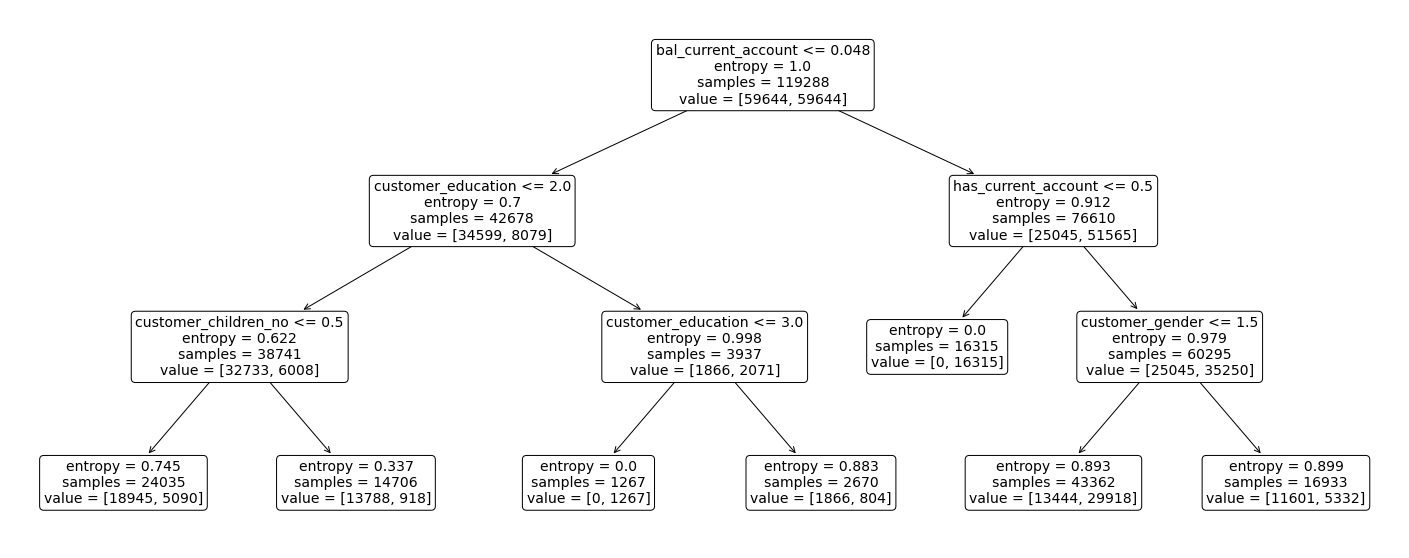

In [53]:
plt.figure(figsize=(25,10))
plot_tree(decision_tree_pruned, feature_names=X.columns, fontsize=14, rounded=True);

Building the decision tree with "entropy"

In [54]:
# create decision tree classifer object
decision_tree_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3)

# build the tree using training data
decision_tree_pruned = decision_tree_pruned.fit(X_sm,y_sm)

# run prediction for test dataset
y_pred_pruned = decision_tree_pruned.predict(X_test)

analyze_results(y_test, y_pred_pruned)

# Using simple Decision Tree classifier
from sklearn import tree

Overall accuracy: 0.7812892949953893


,predict: stay,predict: churn,error
actual: stay,13781,4113,0.229854
actual: churn,3714,14179,0.207567


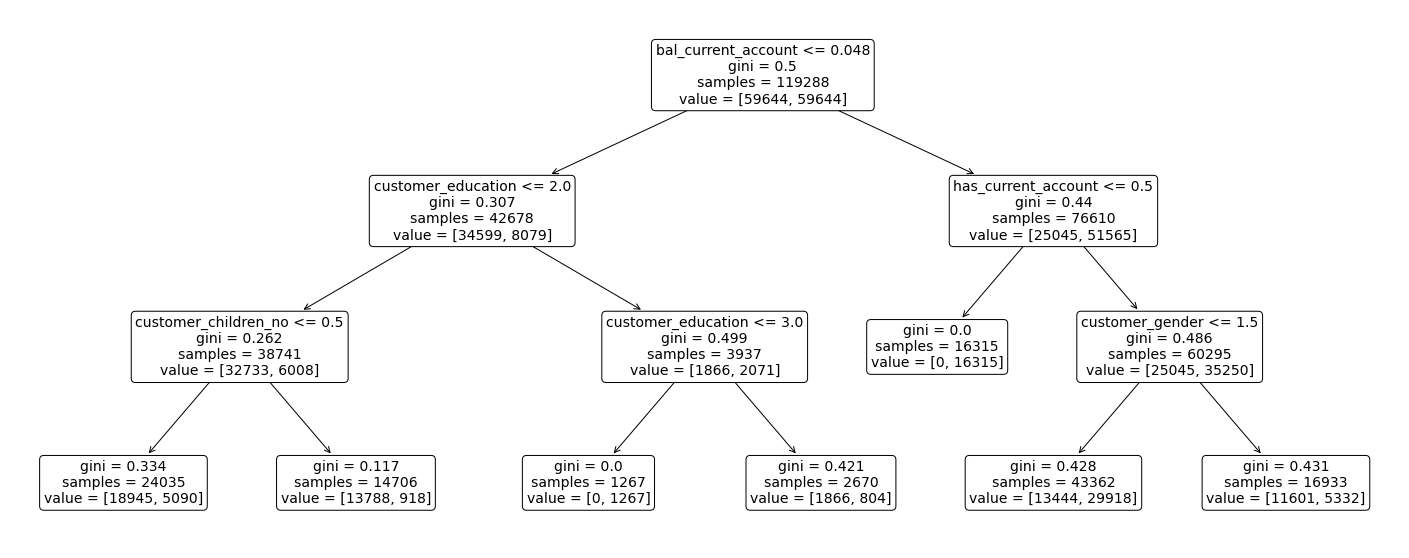

In [55]:
plt.figure(figsize=(25,10))
plot_tree(decision_tree_pruned, feature_names=X.columns, fontsize=14, rounded=True);

We can get the order of importance of the independent variables

In [56]:
imp = pd.DataFrame([*zip(X_train.columns,decision_tree_pruned.feature_importances_)], columns=['vars', 'importance'])
imp.sort_values('importance', ascending=False)  
imp = imp[imp.importance!=0]
imp 

,vars,importance
9,has_current_account,0.193345
21,bal_current_account,0.559843
28,customer_gender,0.149507
32,customer_education,0.079545
40,customer_children_no,0.017761


The parameters are then tuned using grid search

In [ ]:
parameters = {'splitter':('best','random'),
              'criterion':("gini","entropy"),
              "max_depth":[*range(1, 20)],
             }

decision_tree_pruned = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(decision_tree_pruned, parameters, cv=10)
GS.fit(X_train, y_train)

print(GS.best_params_)

print(GS.best_score_) 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, 
                                  random_state=0)
parameters = {'max_depth': np.arange(3, 17, 1) }
GS = GridSearchCV(rf_model, param_grid=parameters, cv=10)
GS.fit(X_sm, y_sm)

print(GS.best_params_) 
print(GS.best_score_) 

In [58]:
decision_tree_pruned.score(X_test, y_test)

0.7812892949953893

In [60]:
print(classification_report(y_test, decision_tree_pruned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     17894
           1       0.78      0.79      0.78     17893

    accuracy                           0.78     35787
   macro avg       0.78      0.78      0.78     35787
weighted avg       0.78      0.78      0.78     35787



# Random forest

In [59]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_sm, y_sm)
rf_clf.score(X_test, y_test)

1.0

In [61]:
print(classification_report(y_test, rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17894
           1       1.00      1.00      1.00     17893

    accuracy                           1.00     35787
   macro avg       1.00      1.00      1.00     35787
weighted avg       1.00      1.00      1.00     35787



# Gradiant Boosting

In [62]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_sm, y_sm)
gb_clf.score(X_test, y_test)

0.9542571324782743

In [64]:
print(classification_report(y_test, gb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17894
           1       1.00      0.91      0.95     17893

    accuracy                           0.95     35787
   macro avg       0.96      0.95      0.95     35787
weighted avg       0.96      0.95      0.95     35787



In [65]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_sm,y_sm)
gb_clf.score(X_test, y_test)

0.9217592980691313

In [66]:
list (rf_clf.predict(X_test))

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,


In [67]:
samples_to_predict = pd.read_csv('test_month_3.csv', index_col='client_id')

In [70]:
predictions = rf_clf.predict(samples_to_predict)
print(predictions)

ValueError: could not convert string to float: '1981-01'